## Range Delay Variation for Deformation Mapping

Data: ChileSenAT149     
Date: 2020-01-11 vs. 2020-01-23

Check spatially referenced range offset, phase, tropo and SET

In [1]:
%matplotlib inline
import os
import numpy as np
from matplotlib import pyplot as plt
from mintpy.utils import readfile, utils as ut, plot as pp
plt.rcParams.update({'font.size': 12})
plt.rcParams['xtick.bottom'] = plt.rcParams['xtick.labelbottom'] = False
plt.rcParams['xtick.top'] = plt.rcParams['xtick.labeltop'] = True

work_dir = os.path.expanduser('~/Papers/2021_Geolocation/figs_src/defo')
os.chdir(work_dir)
print('Go to directory:', work_dir)

# setup
date1, date2 = '20200111', '20200123'  # '20200111', '20200228'
ref_lat, ref_lon = -21.29, -69.58

Go to directory: /Users/yunjunz/Papers/2021_Geolocation/figs_src/defo


### Read Data

In [2]:
# data files
proj_dir = os.path.expanduser('~/data/geolocation/ChileSenAT149/mintpy_offset')
geom_file  = os.path.join(proj_dir, 'inputs/geometryRadar.h5')
tropo_file = os.path.join(proj_dir, 'inputs/ERA5.h5')
off_file   = os.path.join(proj_dir, 'timeseriesRg.h5')
mask_file  = os.path.join(proj_dir, 'residualInvRg.h5')

# read aux
mask = readfile.read(mask_file)[0] <= 0.1

# read hgt
hgt, atr = readfile.read(geom_file, datasetName='height')
hgt[hgt == 0] = np.nan
print('hgt: {:.0f} - {:.0f} m'.format(np.nanmin(hgt), np.nanmax(hgt)))

# calc reference point
coord_obj = ut.coordinate(atr, lookup_file=geom_file)
ref_y, ref_x = coord_obj.geo2radar(ref_lat, ref_lon)[:2]
print('reference Y/X: {}/{}'.format(ref_y, ref_x))

# read offset
off  = readfile.read(off_file, datasetName=date2)[0]
off -= readfile.read(off_file, datasetName=date1)[0]
off[off == 0] = np.nan
off[mask == 0] = np.nan
off -= off[ref_y, ref_x]
print('off: {:.2f} - {:.2f} m'.format(np.nanmin(off), np.nanmax(off)))

# read troposphere
tropo  = readfile.read(tropo_file, datasetName=date2)[0]
tropo -= readfile.read(tropo_file, datasetName=date1)[0]
tropo[tropo == 0] = np.nan
tropo -= tropo[ref_y, ref_x]
print('tropo: {:.2f} - {:.2f} m'.format(np.nanmin(tropo), np.nanmax(tropo)))

hgt: 634 - 6182 m
reference Y/X: 63/15
off: -0.03 - 0.19 m
tropo: -0.01 - 0.24 m


### Plot

save figure to file /Users/yunjunz/Papers/2021_Geolocation/figs_src/defo/off4defo.png


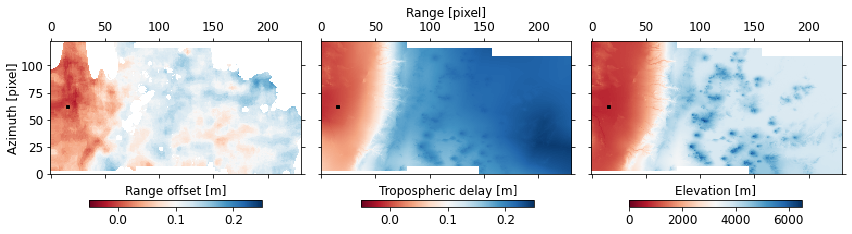

In [3]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=[12, 3], sharex=True, sharey=True)
kwargs = dict(cmap=pp.ColormapExt('RdBu').colormap, interpolation='nearest')
im1 = axs[0].imshow(off,   vmin=-0.05, vmax=0.25, **kwargs)
im2 = axs[1].imshow(tropo, vmin=-0.05, vmax=0.25, **kwargs)
im3 = axs[2].imshow(hgt,   vmin=0,     vmax=6500, **kwargs)
for ax in axs: ax.plot(ref_x, ref_y, 'ks', ms=3)

# axis format
for ax in axs:  ax.tick_params(which='both', direction='out', bottom=True, top=True, left=True, right=True)
axs[0].set_ylabel('Azimuth [pixel]', labelpad=0)
axs[1].set_xlabel('Range [pixel]')
axs[1].xaxis.set_label_position('top') 
axs[0].invert_yaxis()
fig.tight_layout()

# colorbars
cax1 = fig.add_axes([0.110, 0.03, 0.2, 0.03])
cax2 = fig.add_axes([0.425, 0.03, 0.2, 0.03])
cax3 = fig.add_axes([0.735, 0.03, 0.2, 0.03])
labels = ['Range offset [m]', 'Tropospheric delay [m]', 'Elevation [m]']
for cax, im, label in zip([cax1, cax2, cax3], [im1, im2, im3], labels):
    cbar = plt.colorbar(im, cax=cax, orientation='horizontal')
    cbar.set_label(label, labelpad=6)
    cax.xaxis.set_label_position('top')

# output
out_fig = os.path.join(work_dir, 'off4defo.png')
print('save figure to file', out_fig)
#plt.savefig(out_fig, bbox_inches='tight', transparent=True, dpi=300)
plt.show()